# Lesson 3 Assignment - Monty Hall Simulation
## Author - Natalie Moore

### Strategy Analysis: to *Stay* or *Switch* Doors?

#### Figure 1 Analysis: 

Figure 1 shows the frequencies of winning a car for the two strategies of Staying or Switching doors after Monty Hall has showed you the other door. In my two arrays for switching/staying, 1 = car and 0 = goat. Therefore, the more 1's the strategy has the better your chances of winning the car. 

One can clearly see that the switch strategy [left plot] has about twice as many wins, and the stay strategy [right plot] has about twice as many loses. It is, therefore, better to switch doors after Monty shows you the other door since you will have amost double the chances of winning the car.


#### Figure 2 Analysis: 

Figure 2 shows the mean of winning a car for the two strategies of Staying or Switching doors after Monty Hall has showed you the other door. In my two arrays for switching/staying, 1 = car and 0 = goat. Therefore, the more 1's the strategy has the better your chances of winning the car. 

The mean of each of the Stay/Switch arrays is simply the count of each win (all the 1's) divided by how many wins there were. It is clear that the switch strategy has the higher win count, with a mean of 63/100. The stay strategy has a lower win count, with a mean of 37/100.


#### Recommended Strategy:

It is clear from both figures that the switch strategy is better than the stay strategy. It has a higher win count of about twice as many wins per 100 game samples. This is because the premice of the game is that there are twice as many goats as cars.

In [1]:
# Import libraries
from __future__ import division 

import numpy as np
from numpy import matlib
import matplotlib
import matplotlib.pyplot as plt 
import pandas
import random
import scipy
import scipy.stats
from matplotlib import pyplot
import seaborn

# Configure default plot style.
seaborn.set_palette('muted')
seaborn.set_style('ticks')
%matplotlib inline

In [2]:
#simulate the door prizes for one game
#1=car
#0=goat
def DoorPrize_sim(num_samples):
    DoorPrizeOptions = [1, 0, 0]    
    
    x = list(zip(
      ['Door 1', 'Door 2', 'Door 3'], 
      np.random.choice(DoorPrizeOptions, 3, replace=False)))
    
    return x
  
DoorPrize_sim(100)

[('Door 1', 0), ('Door 2', 0), ('Door 3', 1)]

In [3]:
#simulate the door prizes for as many games as you want
#1=car
#0=goat

num_samples = 100

DoorPrizes = np.zeros((num_samples, 3), dtype=int)

for i in range(num_samples):
    Doors, Prizes = zip(*DoorPrize_sim(i))
    DoorPrizes[i] = Prizes
    DoorPrizes_df = pandas.DataFrame(DoorPrizes, columns=Doors)

#uncomment below if you would like to see the DoorPrizes dataframe
#DoorPrizes_df 

In [4]:
#randomly choosing a door, as the game contestant
#each row in the Choices array corresponds to the prize behind each door choice

Choices = np.zeros((num_samples, 1), dtype=int)

for i in range(num_samples):
    Choices[i] = DoorPrizes_df.loc[i,:].sample(1)

#uncomment below if you would like to see the Choices array    
#Choices

In [5]:
#creating the switch and stay arrays, in which each element is either 
#1=(winning a car) or 
#0=(losing, getting a goat)

#if pick car: the door opened is goat
    #switch means to pick goat, losing
    #stay means pick car, winning
#if pick goat: the door opened is also goat
    #switch means to pick car, winning
    #stay means to pick goat, losing

switch = []
stay = []

for i in range(len(Choices)):
    if Choices[i] == 1:
        switch.append(0)
        stay.append(1)
    else:
        switch.append(1)
        stay.append(0)

#uncomment below if you would like to see the switch/stay arrays
#print ("switch: ",switch)
#print ("stay: ",stay)

In [6]:
#making the switch/stay arrays into pandas dataframes
switch = pandas.DataFrame(switch, columns=['Switch Winnings'])
stay = pandas.DataFrame(stay, columns=['Stay Winnings'])

Text(0.5,0.98,'Figure 1: Frequency of Winning the Car per Strategy')

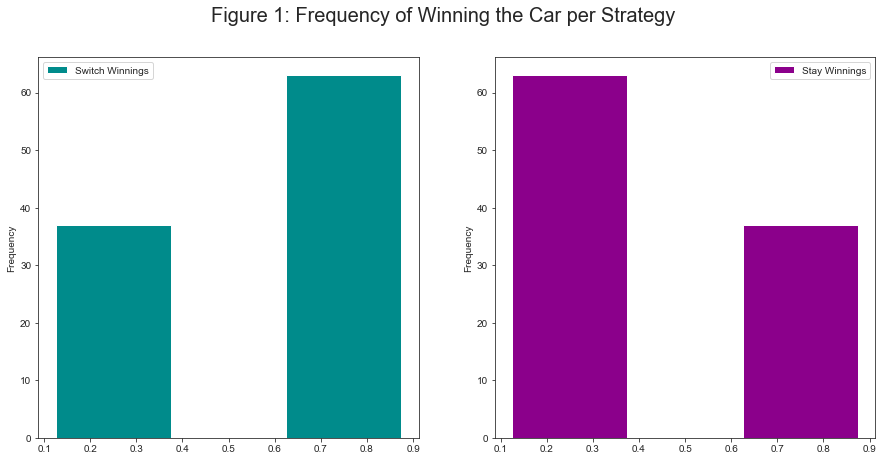

In [16]:
#Histogram of stay/switch winning frequency
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
ax1 = switch[['Switch Winnings']].plot(kind='hist',bins=[0,.5,1],rwidth=0.5, ax=ax[0], color = 'DarkCyan')
ax2 = stay[['Stay Winnings']].plot(kind='hist',bins=[0,.5,1],rwidth=0.5, ax=ax[1], color = 'DarkMagenta')

fig.suptitle('Figure 1: Frequency of Winning the Car per Strategy', fontsize=20)

#### Figure 1 Analysis: 

Figure 1 [above] shows the frequencies of winning a car for the two strategies of Staying or Switching doors after Monty Hall has showed you the other door. In my two arrays for switching/staying, 1 = car and 0 = goat. Therefore, the more 1's the strategy has the better your chances of winning the car. 

One can clearly see that the switch strategy [left plot] has about twice as many wins, and the stay strategy [right plot] has about twice as many loses. It is, therefore, better to switch doors after Monty shows you the other door since you will have amost double the chances of winning the car.

In [9]:
print ("Variance of the Stay strategy: ",np.var(stay))
print ("")
print ("Variance of the Switch strategy: ",np.var(switch))

Variance of the Stay strategy:  Stay Winnings    0.2331
dtype: float64

Variance of the Switch strategy:  Switch Winnings    0.2331
dtype: float64


From the variance of each strategy above, it's clear that the variance is the same per strategy since there is only two values: 0, and 1.

Mean of the Stay strategy:  Stay Winnings    0.37
dtype: float64

Mean of the Switch strategy:  Switch Winnings    0.63
dtype: float64


Text(0,0.5,'Mean Winnings')

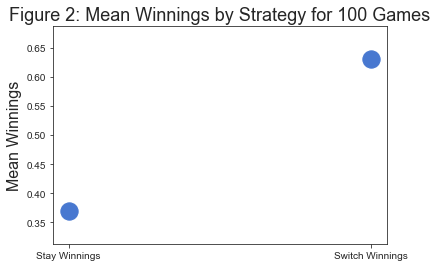

In [70]:
print ("Mean of the Stay strategy: ",np.mean(stay))
print ("")
print ("Mean of the Switch strategy: ",np.mean(switch))

Winning_means = [np.mean(stay),np.mean(switch)]

columns=['Stay Winnings', 'Switch Winnings']
plt.scatter(columns, Winning_means, s=300)
plt.title("Figure 2: Mean Winnings by Strategy for 100 Games", fontsize=18)
plt.ylabel("Mean Winnings", fontsize=16)

#### Figure 2 Analysis: 

Figure 2 [above] shows the mean of winning a car for the two strategies of Staying or Switching doors after Monty Hall has showed you the other door. In my two arrays for switching/staying, 1 = car and 0 = goat. Therefore, the more 1's the strategy has the better your chances of winning the car. 

The mean of each of the Stay/Switch arrays is simply the count of each win (all the 1's) divided by how many wins there were. It is clear that the switch strategy has the higher win count, with a mean of 63/100. The stay strategy has a lower win count, with a mean of 37/100.